Das System hat keine Auflagermomente


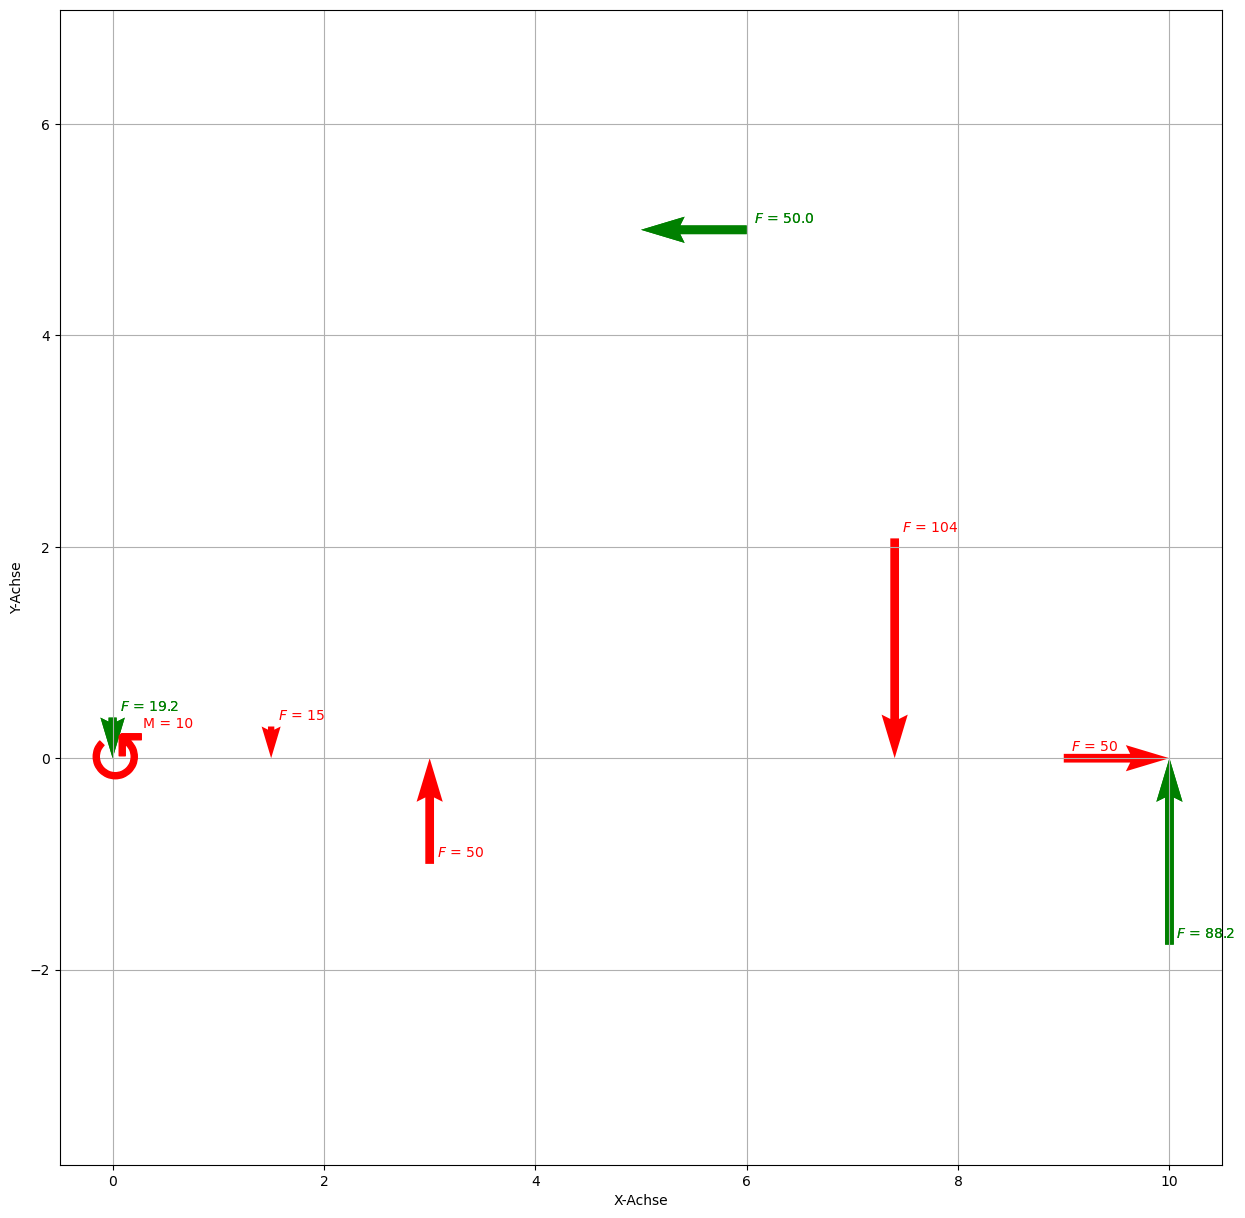

In [1]:
from equilibrium import Actionforce, Actionmoment, Reactionforce, Reactionmoment, System, Plot



einwirkungen_kraefte = [Actionforce(-15,90, 1.5,0), Actionforce(50, 90, 3,0), Actionforce(-104, 90, 7.4, 0), Actionforce(50, 0,10,0)]
einwirkungen_momente = [Actionmoment(10, 0,0)]
reaktionen_kraefte = [Reactionforce(90, 0, 0), Reactionforce(90, 10,0), Reactionforce(0,5,5)]

system_1 = System(actionforces=einwirkungen_kraefte, reactionforces=reaktionen_kraefte, actionmoments=einwirkungen_momente)
system_1.calculate_reaction_force()


Plot(system_1).plot_forces_and_moments()


Das System hat keine Auflagermomente


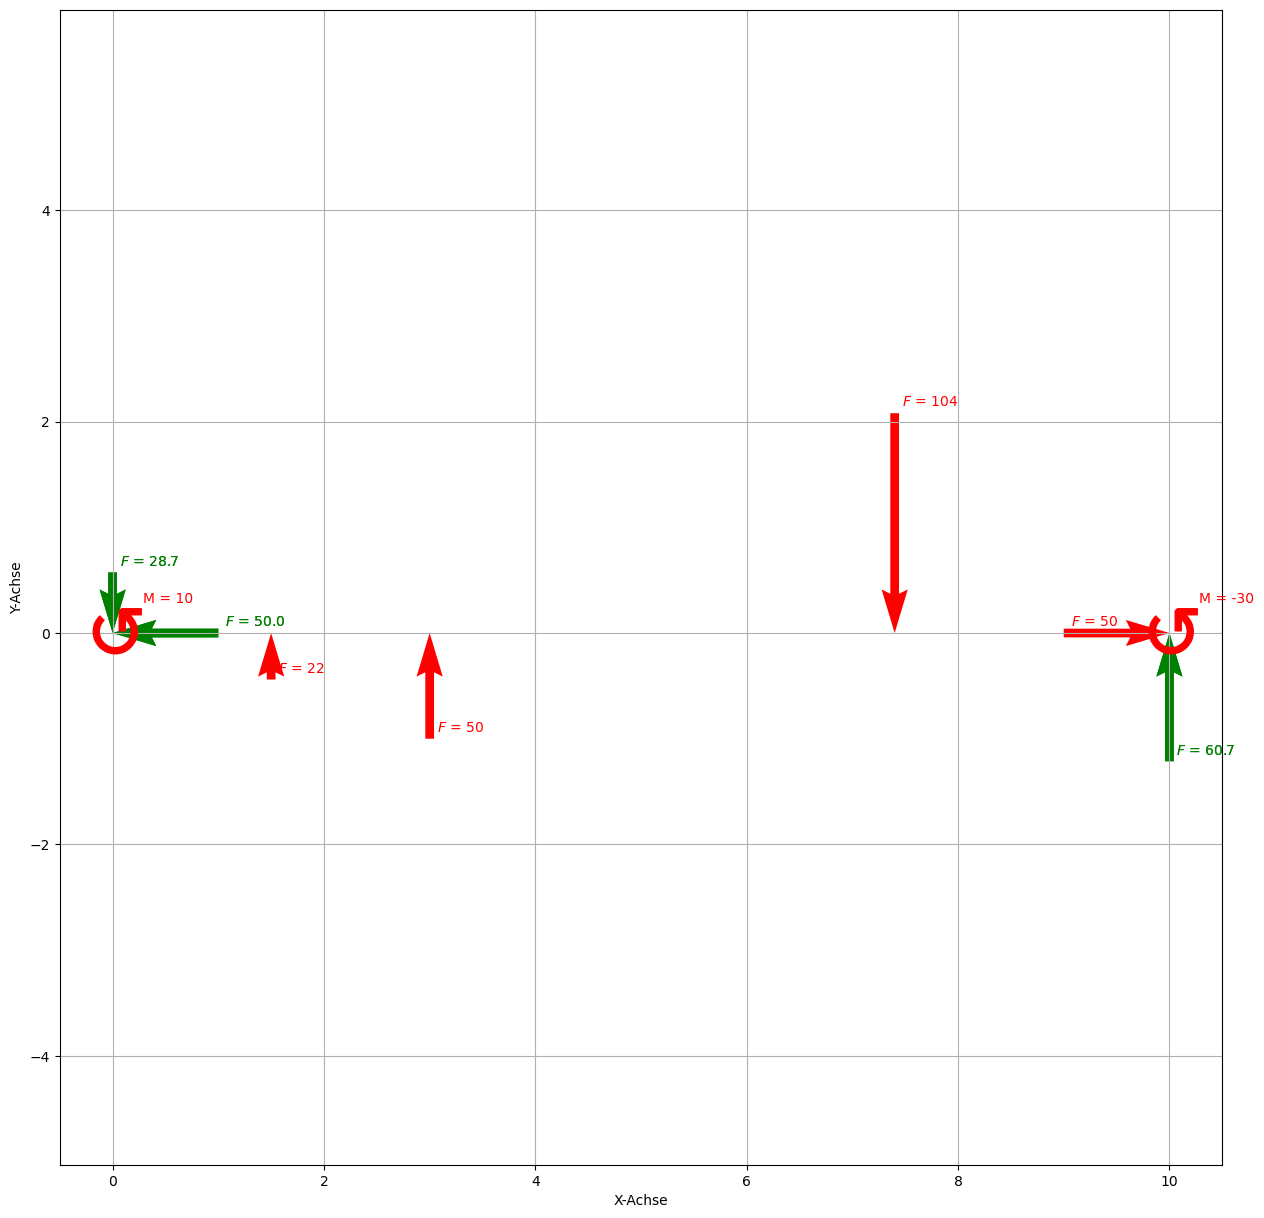

In [2]:
einwirkungen_kraefte = [Actionforce(22,90, 1.5,0), Actionforce(50, 90, 3,0), Actionforce(-104, 90, 7.4, 0), Actionforce(50, 0,10,0)]
einwirkungen_momente = [Actionmoment(10, 0,0), Actionmoment(-30, 10,0)]
reaktionen_kraefte = [Reactionforce(90, 0, 0), Reactionforce(90, 10,0), Reactionforce(0,0,0)]

system_2 = System(actionforces=einwirkungen_kraefte, reactionforces=reaktionen_kraefte, actionmoments=einwirkungen_momente)
system_2.calculate_reaction_force()


Plot(system_2).plot_forces_and_moments()

Das System hat keine Auflagermomente


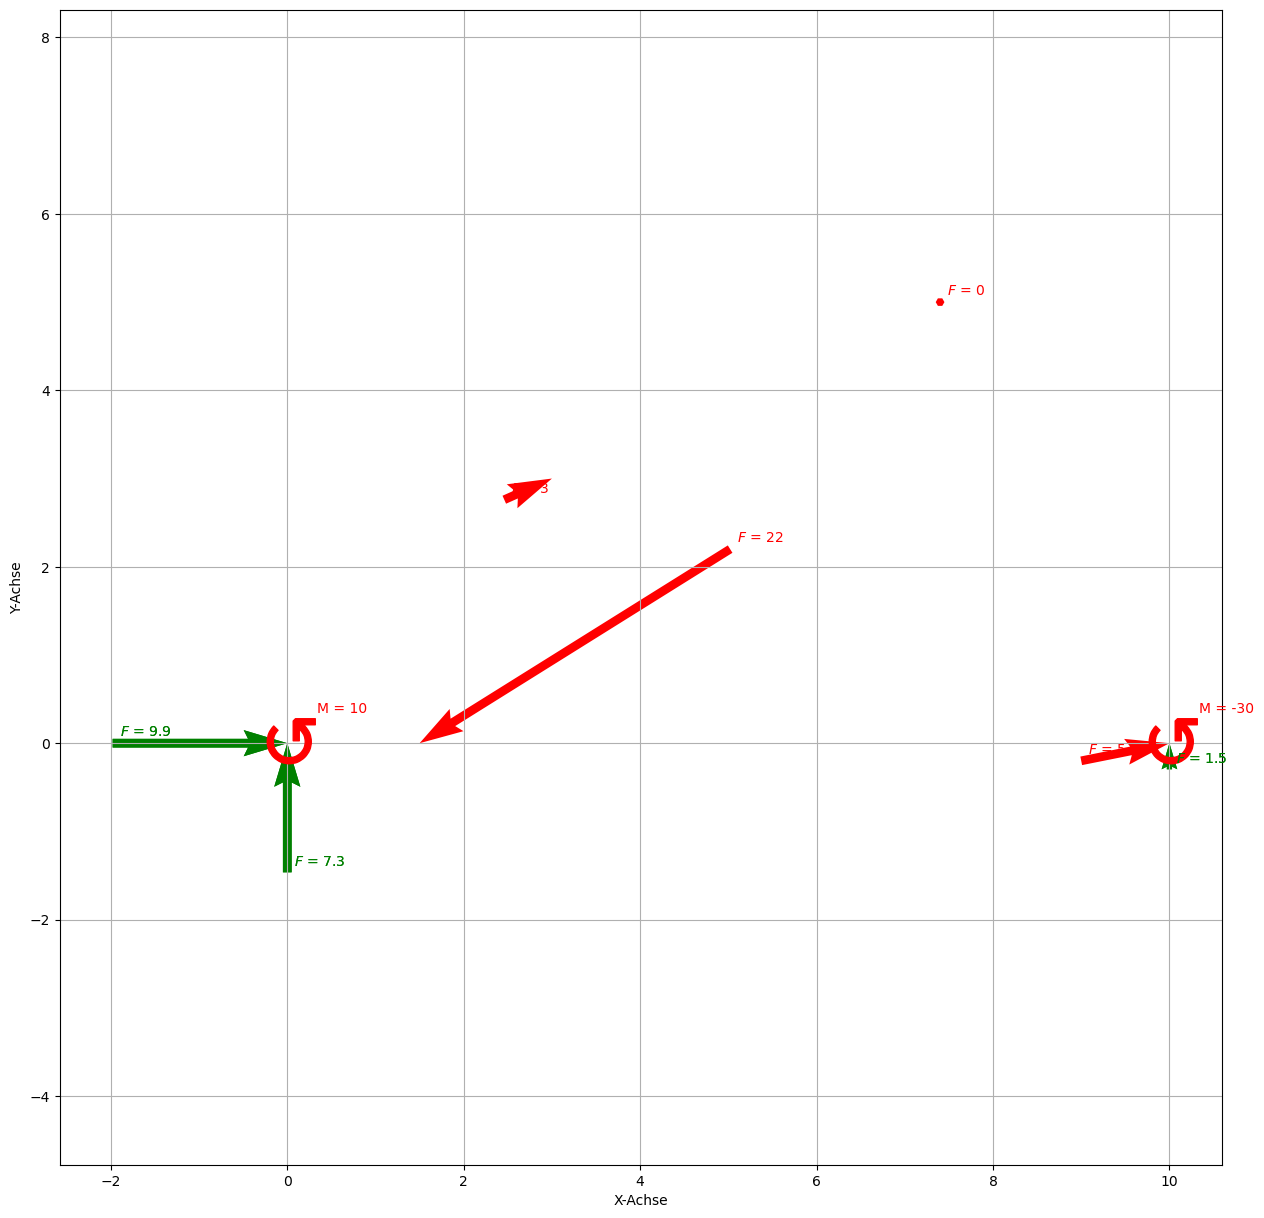

In [3]:
einwirkungen_kraefte = [Actionforce(-22,32, 1.5,0), Actionforce(3, 22, 3,3), Actionforce(-0, 90, 7.4, 5), Actionforce(5, 12,10,0)]
einwirkungen_momente = [Actionmoment(10, 0,0), Actionmoment(-30, 10,0)]
reaktionen_kraefte = [Reactionforce(90, 0, 0), Reactionforce(90, 10,0), Reactionforce(0,0,0)]

system_3 = System(actionforces=einwirkungen_kraefte, reactionforces=reaktionen_kraefte, actionmoments=einwirkungen_momente)
system_3.calculate_reaction_force()


Plot(system_3).plot_forces_and_moments()

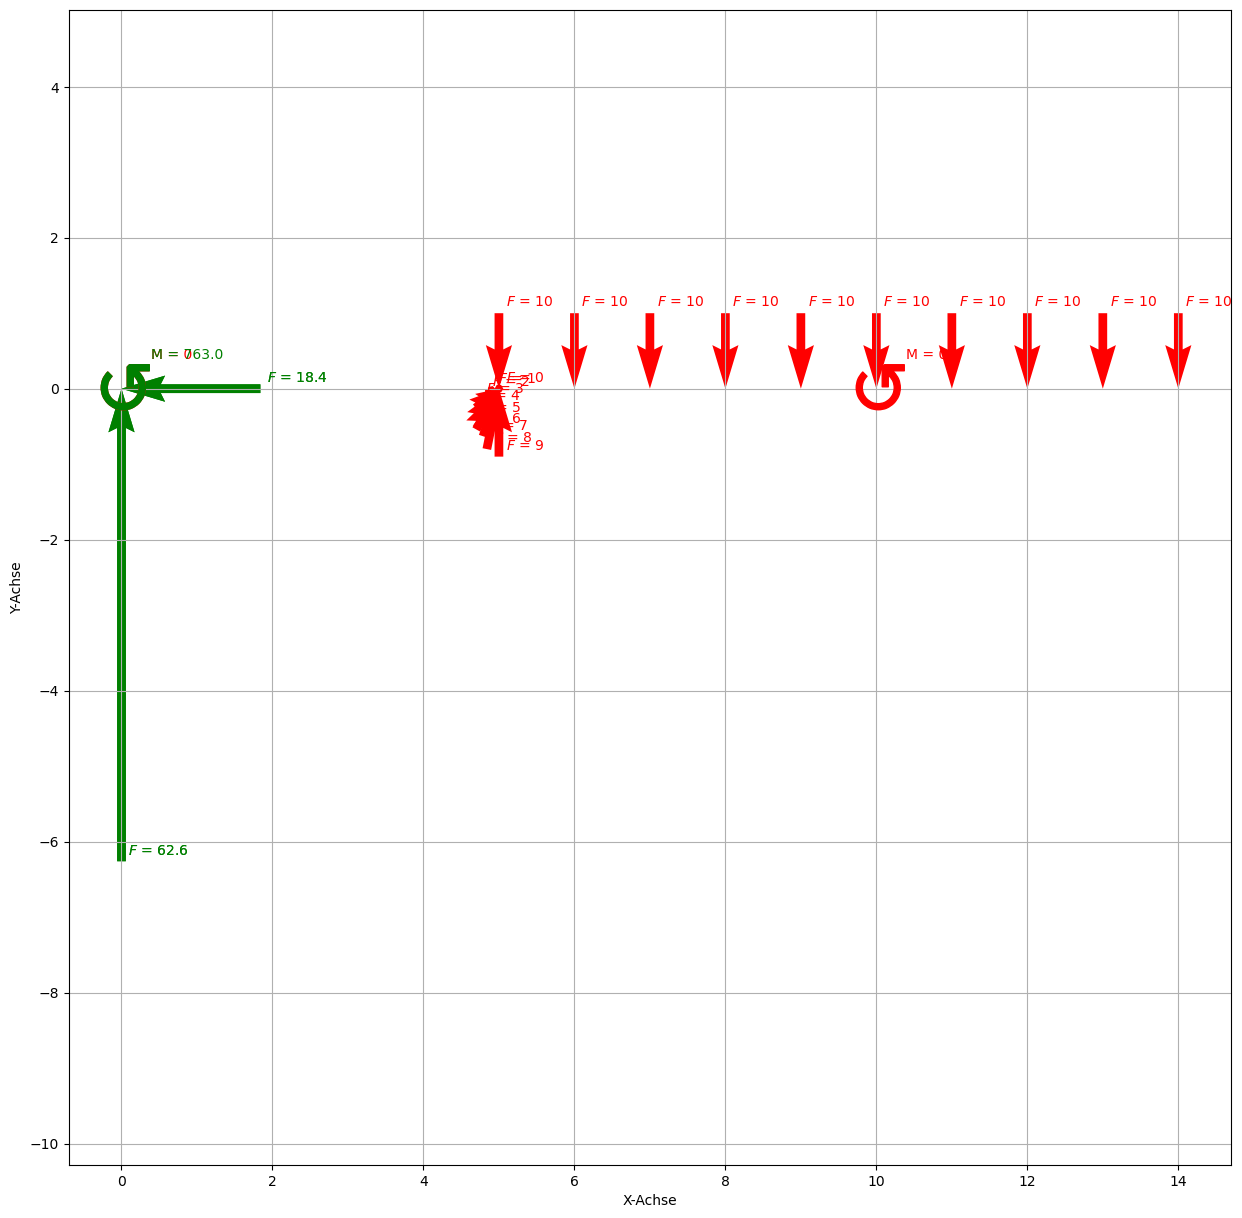

In [4]:
einwirkungen_kraefte = []

for i in range(10):
    einwirkungen_kraefte.append(Actionforce(10, -90, 5+i, 0))
    einwirkungen_kraefte.append(Actionforce(i, i*10, 5,0))


einwirkungen_momente = [Actionmoment(0, 0,0), Actionmoment(0, 10,0)]
reaktionen_kraefte = [Reactionforce(90, 0, 0), Reactionforce(0,0,0)]
reaktionen_moment = [Reactionmoment(0,0)]

system_3 = System(actionforces=einwirkungen_kraefte, reactionforces=reaktionen_kraefte, actionmoments=einwirkungen_momente, reactionmoments=reaktionen_moment)
system_3.calculate_reaction_force()


Plot(system_3).plot_forces_and_moments()